In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data = pd.read_excel('F:\\Final Project\\datav2.xlsx')

In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,57,58,59,60,61,62,63,64,65,Label
0,0.555464,0.239209,0.582830,0.187129,0.602108,0.184746,0.621800,0.182669,0.520330,0.195792,...,2.030876,0.648026,2.107546,0.311694,2.101078,0.583067,2.232680,0.354405,2.190867,1
1,0.553931,0.237383,0.580890,0.185844,0.600988,0.183981,0.620452,0.182361,0.516814,0.194151,...,2.064693,0.665667,2.130849,0.345311,2.134606,0.612249,2.253368,0.385306,2.226025,1
2,0.552951,0.235075,0.578214,0.185490,0.598909,0.183895,0.618238,0.182369,0.514727,0.193127,...,2.061121,0.671525,2.129810,0.353002,2.131238,0.621628,2.252322,0.395129,2.222150,1
3,0.551918,0.233775,0.576252,0.185469,0.597291,0.183960,0.616575,0.182749,0.513440,0.192684,...,2.056697,0.674349,2.129521,0.356104,2.126306,0.624636,2.247487,0.399488,2.217579,1
4,0.551571,0.233788,0.575378,0.185783,0.596681,0.184344,0.616011,0.183174,0.511380,0.192960,...,2.023665,0.683198,2.103317,0.369015,2.094599,0.633559,2.216070,0.407064,2.180048,1


# Behavior classification

#### Number : Class name
#### 1 : Looking-Forward
#### 2 : Bowing
#### 3 : Raising-Hand

In [4]:
data['Label'].value_counts()

Label
2    2202
1    1063
3     140
Name: count, dtype: int64

In [5]:
X = data.drop('Label', axis=1)

y = data['Label']

# Training model

In [6]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
models = {'SVM' : SVC(),
          'LogisticRegression' : LogisticRegression(max_iter=1000)}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)

    model_scores = {}

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        model_scores[model_name] = score

    return model_scores

In [9]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

In [10]:
model_scores

{'SVM': 0.788546255506608, 'LogisticRegression': 0.8149779735682819}

In [11]:
log_reg_grid = {
    'C': np.logspace(-4, 4, 20)
    # 'solver': ['liblinear']
}

# set up grid hyperparameter search for Logistic Regression
gs_log_reg = GridSearchCV(SVC(), 
                                          log_reg_grid, 
                                          cv=5, 
                                          verbose=True)

# train the model
gs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
             verbose=True)

In [12]:
gs_log_reg.score(X_test, y_test)

0.9632892804698973

In [13]:
y_preds = gs_log_reg.predict(X_test)

In [14]:
gs_log_reg.best_params_

{'C': 10000.0}

In [15]:
confusion_matrix = metrics.confusion_matrix(y_test, y_preds)

confusion_matrix

array([[200,   5,   1],
       [ 17, 430,   1],
       [  0,   1,  26]], dtype=int64)

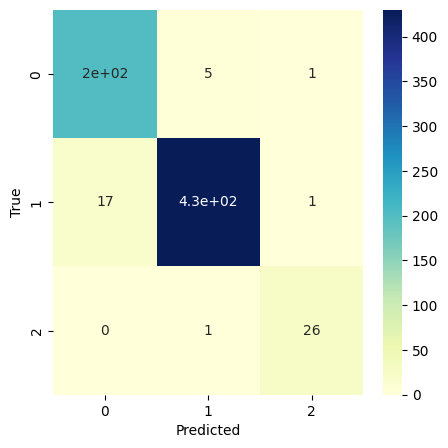

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix, annot=True, cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [17]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.92      0.97      0.95       206
           2       0.99      0.96      0.97       448
           3       0.93      0.96      0.95        27

    accuracy                           0.96       681
   macro avg       0.95      0.96      0.95       681
weighted avg       0.96      0.96      0.96       681



In [18]:
model = SVC(C=10000.0)
model.fit(X_train, y_train)

SVC(C=10000.0)